In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [8]:
from utils.dataprep import load_emb_pickled

dataset = "data/big/mcrae-wordnet-vgg16.32bit"

metadata, embeddings = load_emb_pickled(dataset)
filenames = metadata.get("fnames")
categories = metadata.get("categories")
classes = metadata.get("classes")

Loading features from data/big/mcrae-wordnet-vgg16.32bit.npy.gz
Loading metadata from data/big/mcrae-wordnet-vgg16.32bit.meta.pkl
4 categories found.


In [30]:
class_names, class_idx = np.unique(classes, return_inverse=True)
class_idx

array([0, 0, 0, ..., 3, 3, 3])

In [9]:
vectors_reduced = PCA(n_components=50).fit_transform(embeddings)
vectors_reduced

array([[-3.5401569e-03, -4.6963454e-03, -1.2578795e-03, ...,
        -3.2819710e-03,  2.6232642e-03, -1.6448201e-04],
       [-4.0534451e-03, -5.3335275e-03, -1.7996189e-03, ...,
        -2.8148431e-03, -4.4980962e-04, -3.0197369e-04],
       [-2.8963203e-03, -4.4569527e-03, -1.1491713e-03, ...,
        -1.3784486e-03, -3.9180063e-04, -1.2876821e-03],
       ...,
       [-6.9512222e-03, -8.4329313e-03, -6.5127048e-03, ...,
        -2.5264383e-03, -5.0238241e-03, -6.8807974e-05],
       [-4.6455110e-03, -9.1987653e-03, -9.2258528e-03, ...,
        -8.0521395e-03,  1.3574009e-02, -3.1254080e-03],
       [-5.5678436e-03, -8.0886055e-03, -7.4854610e-03, ...,
        -4.9114455e-03,  8.0798374e-04,  3.0401731e-03]], dtype=float32)

In [10]:
coords_2 = TSNE(n_components=2).fit_transform(vectors_reduced)

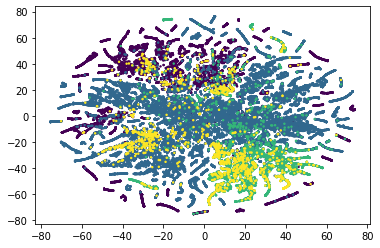

In [14]:
plt.scatter(*coords_2.T, c=class_idx, s=np.ones_like(class_idx)*2)
plt.legend(handles=scatter.legend_elements()[0], labels=list(class_names))

In [27]:
from umap.umap_ import UMAP

In [28]:
coords_2 = UMAP(n_components=2, n_neighbors=10).fit_transform(vectors_reduced)

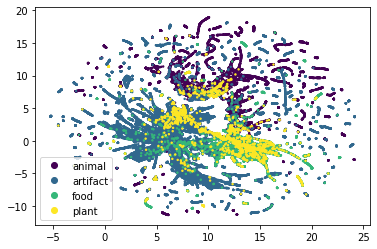

In [37]:
scatter = plt.scatter(*coords_2.T, c=class_idx, s=np.ones_like(class_idx)*2)
plt.legend(handles=scatter.legend_elements()[0], labels=list(class_names))